In [11]:
import numpy as np
from statistics import mode
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score, auc
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
import time
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the dataset into numpy arrays
train_samples = X_train
train_labels = y_train
test_points = X_test

# Define the range of radius values to test
radius_values = np.arange(0.5, 5.1, 0.5)  # You can adjust the range and step size
best_radius = None
best_accuracy = 0

# Lists to store results
results = []

for radius in radius_values:
    predicted_classes = []  # List to store predicted classes
    outcome = pd.DataFrame(columns=['Predict'])

    start_train = time.time()

    # Pre-compute distances between all test points and train samples
    all_distances = distance.cdist(test_points, train_samples, 'euclidean')

    for j, test_point in enumerate(test_points):
        distances = all_distances[j]

        # Find neighbor points within the radius
        neighbor_indices = np.where(distances <= radius)[0]
        neighbor_distances = distances[neighbor_indices]

        # Assign weights to neighbor points based on inverse distance
        weights = 1 / neighbor_distances
        labels_of_neighbors = train_labels[neighbor_indices]

        # Calculate total weight for each class
        total_weights = {cls: np.sum(weights[labels_of_neighbors == cls]) for cls in np.unique(train_labels)}

        # Predict the target class based on higher weight
        predicted_class = max(total_weights, key=total_weights.get)
        predicted_classes.append(predicted_class)

        new_predicted_classes = []

        for i, neighbor_index in enumerate(neighbor_indices):
            neighbor_point = train_samples[neighbor_index]

            # Calculate Euclidean distance between test point and train points in the new region
            new_distances = distance.cdist([neighbor_point], train_samples, 'euclidean')[0]

            # Find new neighbor points within the radius
            new_neighbor_indices = np.where(new_distances <= radius)[0]
            new_neighbor_distances = new_distances[new_neighbor_indices]

            # Assign weights to new neighbor points based on inverse distance
            new_weights = 1 / new_neighbor_distances
            new_labels_of_neighbors = train_labels[new_neighbor_indices]

            # Calculate total weight for each class
            new_total_weights = {cls: np.sum(new_weights[new_labels_of_neighbors == cls]) for cls in np.unique(train_labels)}

            # Predict the target class based on higher weight in the new region
            new_predicted_class = max(new_total_weights, key=new_total_weights.get)
            predicted_classes.append(new_predicted_class)

        end_train = time.time()

        start_test = time.time()
        # Predict the final outcome
        mode_predicted_class = mode(predicted_classes)
        end_test = time.time()
        outcome.loc[j] = mode_predicted_class
        predicted_classes.clear()

    # Calculate accuracy for the current radius
    accuracy = accuracy_score(y_test, outcome['Predict'].astype(int))

    # Calculate training and testing time
    training_time = end_train - start_train
    testing_time = end_test - start_test

    # Update the best radius if the current one is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_radius = radius
        best_outcome = outcome['Predict'].astype(int)  # Store the best outcome

    # Store results
    results.append({
        "Radius": radius,
        "Accuracy": accuracy,
        "Training Time": training_time,
        "Testing Time": testing_time
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
results_df

C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\

C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\

C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\

C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\

C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\Temp\ipykernel_2232\2671779708.py:74: RuntimeWarning: divide by zero encountered in divide
  new_weights = 1 / new_neighbor_distances
C:\Users\acer\AppData\Local\

,Radius,Accuracy,Training Time,Testing Time
0,0.5,0.966667,0.113762,0.0
1,1.0,1.000000,0.219447,0.0
2,1.5,0.966667,0.288511,0.0
3,2.0,0.966667,0.355493,0.0
4,2.5,0.966667,0.409770,0.0
5,3.0,0.933333,0.467258,0.0
6,3.5,0.733333,0.539649,0.0
7,4.0,0.700000,0.486573,0.0
8,4.5,0.700000,0.628948,0.0
9,5.0,0.633333,0.601564,0.0


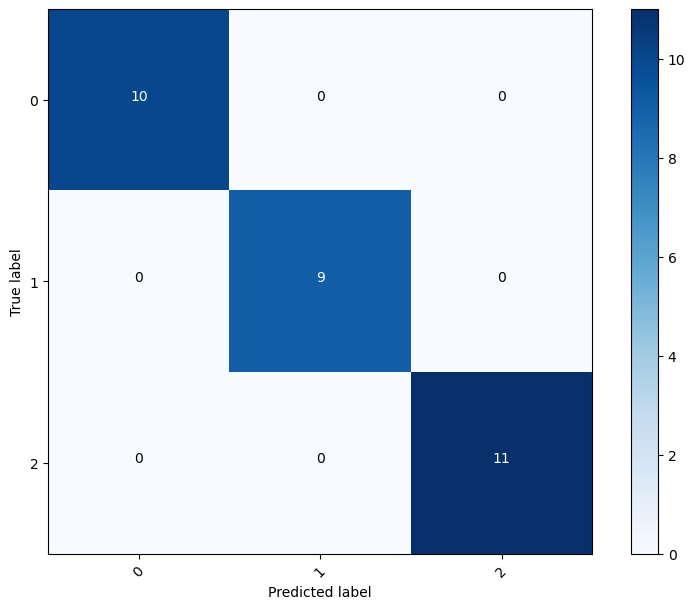

In [14]:
# Plot confusion matrix for Voting Classifier
import itertools


cm_voting = confusion_matrix(y_test, best_outcome)

plt.figure(figsize=(8, 6))
plt.imshow(cm_voting, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['0', '1', '2'], rotation=45)
plt.yticks(tick_marks, ['0', '1', '2'])

thresh = cm_voting.max() / 2.
for i, j in itertools.product(range(cm_voting.shape[0]), range(cm_voting.shape[1])):
    plt.text(j, i, format(cm_voting[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm_voting[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [8]:
# Calculate TPR, FNR, TNR, FPR
TP = np.diag(conf_matrix)
FP = conf_matrix.sum(axis=0) - TP
FN = conf_matrix.sum(axis=1) - TP
TN = conf_matrix.sum() - (FP + FN + TP)

TPR = TP / (TP + FN)
FNR = FN / (TP + FN)
TNR = TN / (TN + FP)
FPR = FP / (TN + FP)

print("True Positive Rate (TPR):", TPR)
print("False Negative Rate (FNR):", FNR)
print("True Negative Rate (TNR):", TNR)
print("False Positive Rate (FPR):", FPR)

True Positive Rate (TPR): [1. 1. 1.]
False Negative Rate (FNR): [0. 0. 0.]
True Negative Rate (TNR): [1. 1. 1.]
False Positive Rate (FPR): [0. 0. 0.]


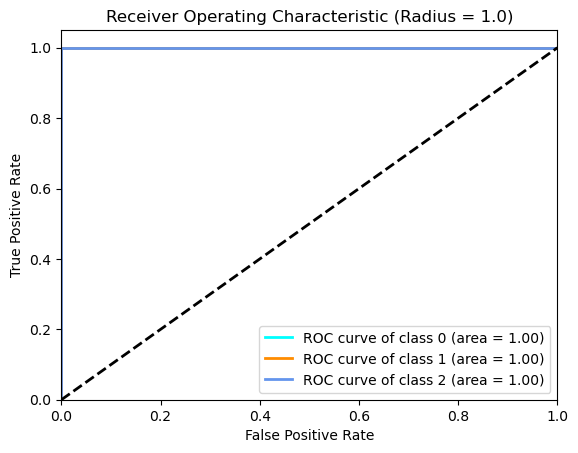

In [9]:
# Generate AUC-ROC curve for the best radius point
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
best_outcome_binarized = label_binarize(best_outcome, classes=[0, 1, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], best_outcome_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (Radius = {best_radius})')
plt.legend(loc='lower right')
plt.show()

In [3]:
import numpy as np
radius_values = np.arange(0.5, 5.1)
radius_values

array([0.5, 1.5, 2.5, 3.5, 4.5])